# **Logistic Regression Analysis: Wine Datasets**

Marquez, Keith Leigh Zhen R.

# Data Wrangling:

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
wd = pd.concat([X,y], axis=1)
wd

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
wd.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
class                             int64
dtype: object

In [ ]:
# Check for duplicates
duplicate_rows = wd.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# EDA (exploratory data analysis):

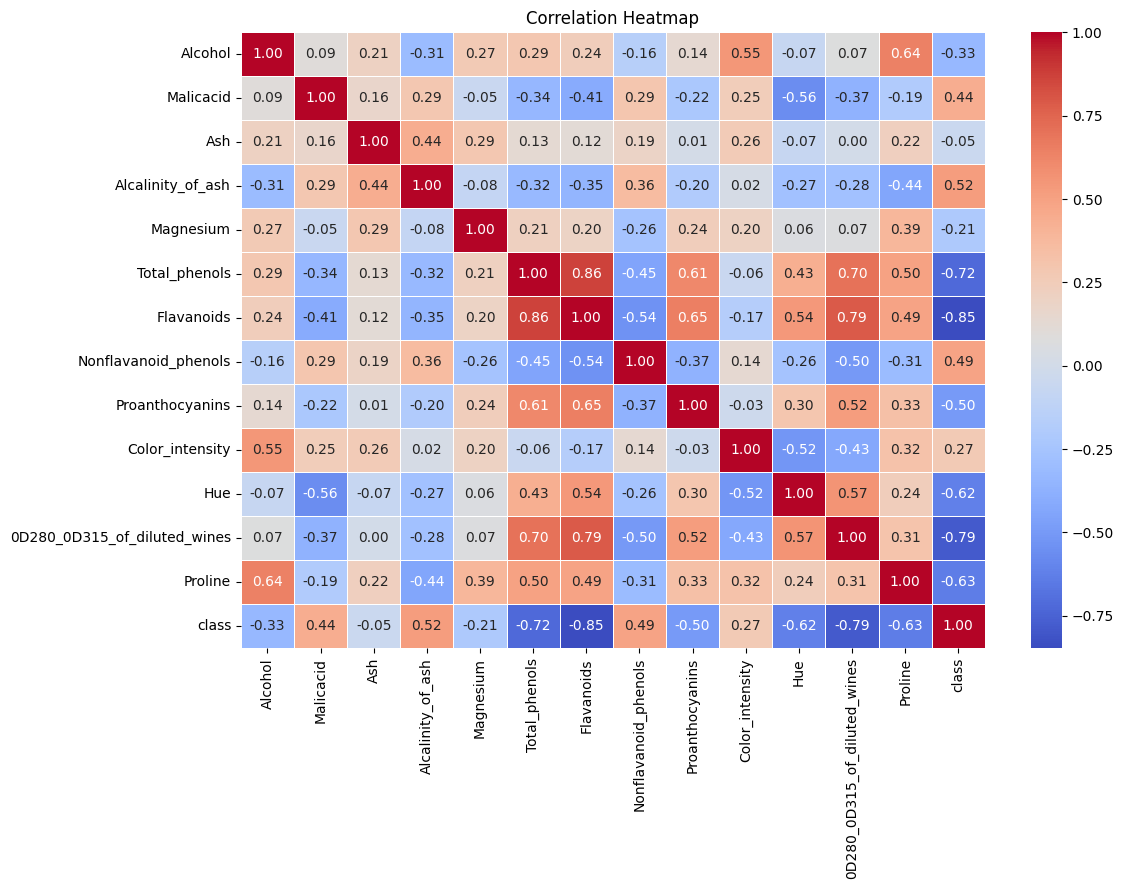

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation Heatmap")
sns.heatmap(wd.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

The correlation heatmap reveals relationships between various chemical properties of wine. Key findings include a strong positive correlation between Total phenols and Flavanoids, and between OD280/OD315 and Flavanoids. Conversely, there's a strong negative correlation between Alcalinity of ash and Total phenols. These insights can inform winemakers about factors influencing wine quality and guide production processes. For instance, enhancing total phenols could improve taste, while managing alkalinity of ash can help achieve desired wine profiles. Overall, leveraging such analyses can optimize wine quality by focusing on influential chemical properties.

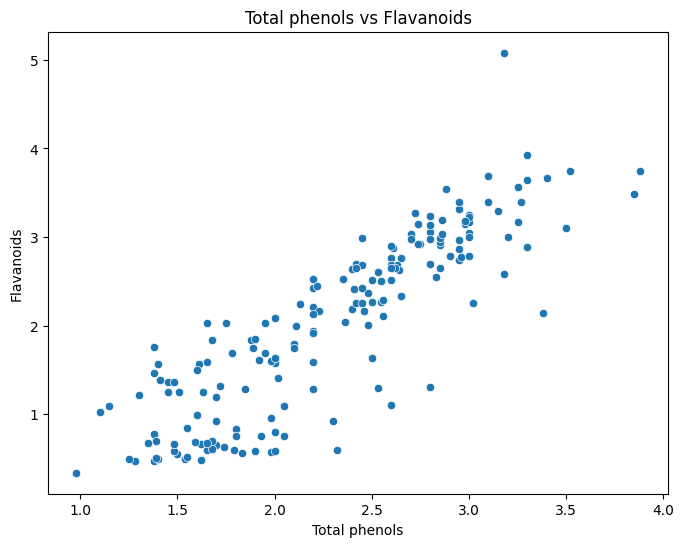

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_phenols', y='Flavanoids', data=wd)
plt.title('Total phenols vs Flavanoids')
plt.xlabel('Total phenols')
plt.ylabel('Flavanoids')
plt.show()

The scatter plot illustrates the relationship between Total Phenols and Flavanoids in a dataset. It indicates a positive correlation, indicating that as Total Phenols increase, so do Flavanoids. Data points are spread out but concentrated at moderate levels of both Phenols and Flavanoids. This suggests that higher Phenols are likely to correspond to higher Flavanoids, possibly indicating a biological or chemical connection.

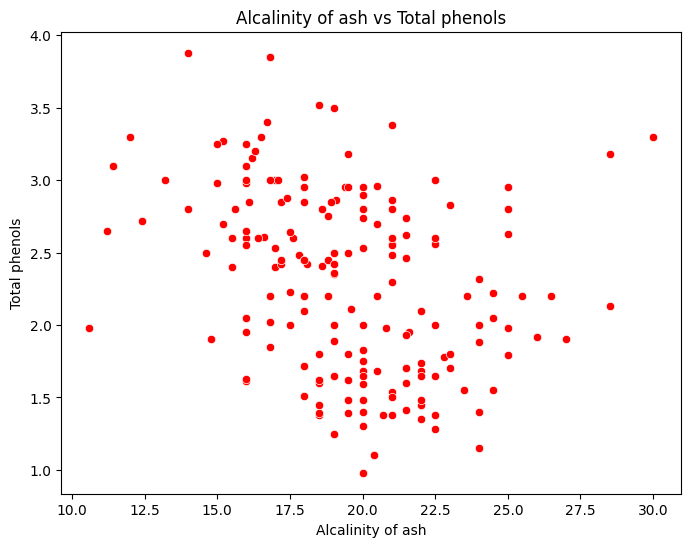

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Alcalinity_of_ash', y='Total_phenols', data=wd, color='red')
plt.title('Alcalinity of ash vs Total phenols')
plt.xlabel('Alcalinity of ash')
plt.ylabel('Total phenols')
plt.show()

The scatter plot compares Alkalinity of ash (ranging from 10 to 30) on the x-axis with Total phenols (ranging from 1 to 4) on the y-axis. There's no discernible pattern in the data distribution, indicating no clear correlation between the variables. This suggests that the alkalinity of ash may not consistently predict total phenols content.

<ipython-input-10-f60969592d45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Color_intensity_bins', y='Alcohol', data=wd, palette='Set3')


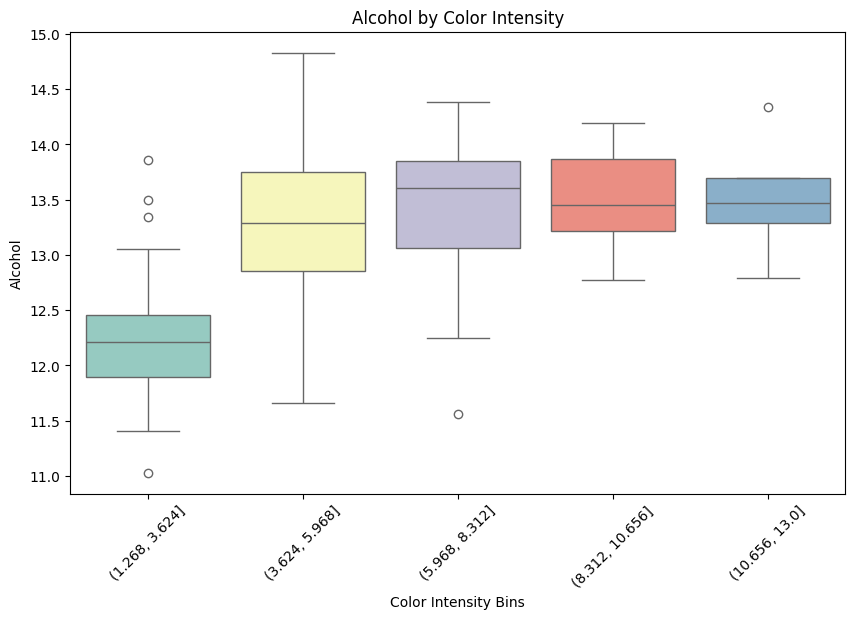

In [ ]:
plt.figure(figsize=(10, 6))
wd['Color_intensity_bins'] = pd.cut(wd['Color_intensity'], bins=5)
sns.boxplot(x='Color_intensity_bins', y='Alcohol', data=wd, palette='Set3')
plt.title('Alcohol by Color Intensity')
plt.xlabel('Color Intensity Bins')
plt.ylabel('Alcohol')
plt.xticks(rotation=45)
plt.show()

Lower color intensity bins exhibit greater variability in alcohol levels, contrasting with mid-range bins that show consistent distributions. Outliers in higher intensity bins suggest deviations from the general trend, while the highest intensity bin indicates both a higher median alcohol content and significant variability. Overall, while a trend of higher alcohol content with increased color intensity emerges

<ipython-input-11-0c9cd1d7ccc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=wd, palette='Set1')


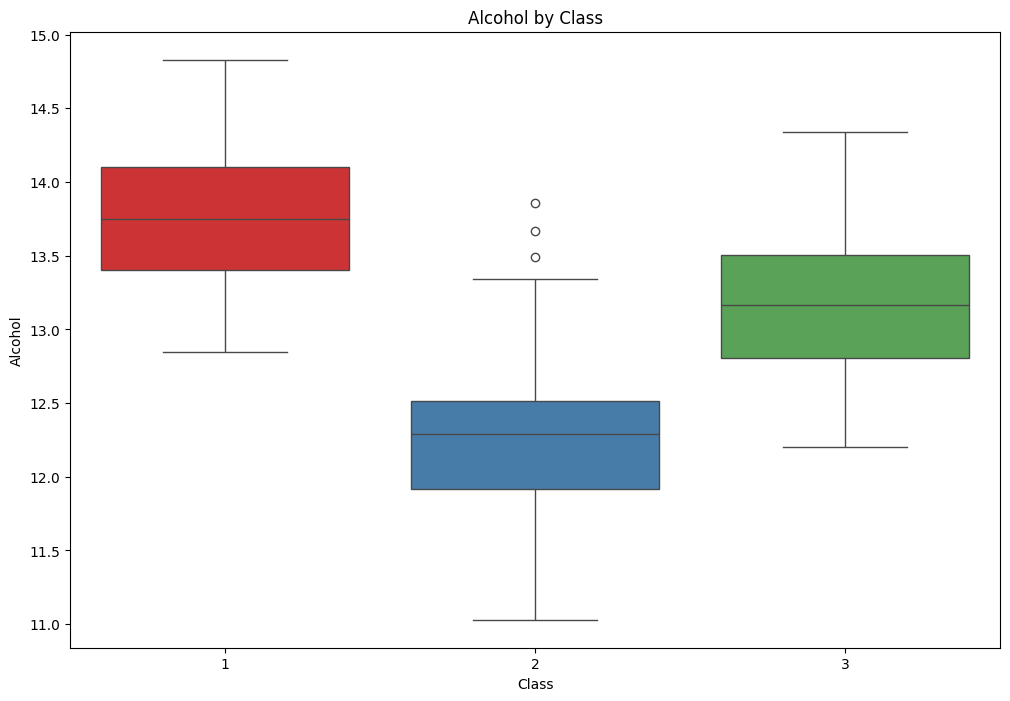

<ipython-input-11-0c9cd1d7ccc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=wd, palette='Set1')


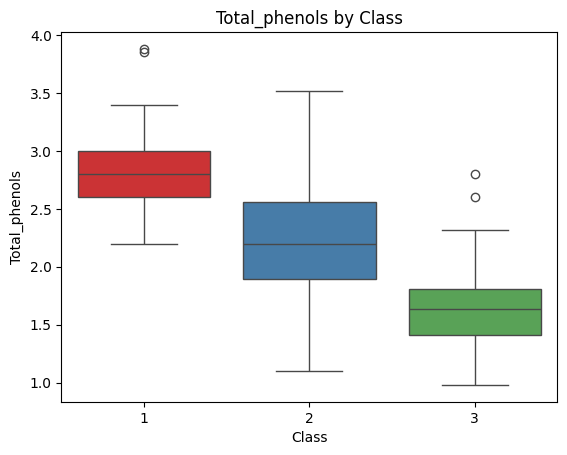

<ipython-input-11-0c9cd1d7ccc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=wd, palette='Set1')


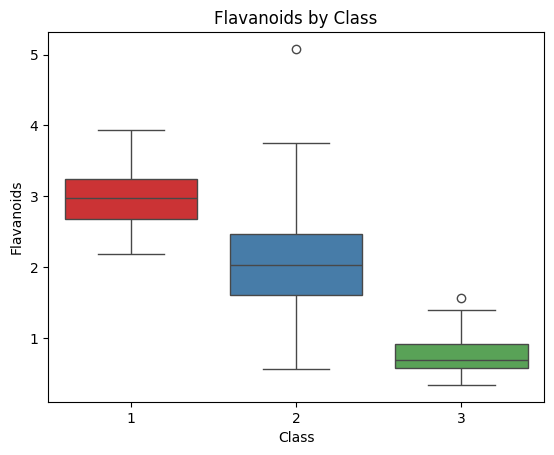

<ipython-input-11-0c9cd1d7ccc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=wd, palette='Set1')


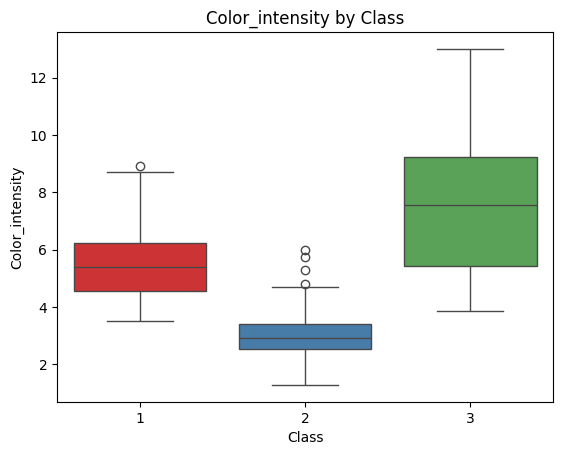

In [ ]:
plt.figure(figsize=(12, 8))
features_of_interest = ['Alcohol', 'Total_phenols', 'Flavanoids', 'Color_intensity']
for feature in features_of_interest:
    sns.boxplot(x='class', y=feature, data=wd, palette='Set1')
    plt.title(f'{feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.show()

Alcohol by Class:
Class 1 (Red) has the highest median alcohol content, indicating consistency.
Class 2 (Blue) shows lower median alcohol content with outliers, suggesting variability.
Class 3 (Green) has a median alcohol content close to Class 1 but with more variability.
Total Phenols by Class:
Class 1 generally has higher total phenol levels, with some outliers.
Class 2 exhibits more variability in phenol levels.
Class 3 has the lowest median phenol levels but also shows outliers.
Flavonoids by Class:
Class 1 contains significantly higher levels of flavonoids.
Class 2 has moderate levels but greater variability and an outlier.
Class 3 consistently shows low levels of flavonoids.
Color Intensity by Class:
Each class has a unique distribution of color intensity.
Class 2 shows significant variability, especially with outliers.
Class 3 has the highest median intensity.

# Logistic Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit the model on the training data

In [ ]:
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Predict the classes on the testing data

In [ ]:
y_pred = logistic_reg.predict(X_test)

Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9722222222222222


Classification report

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



The analysis reveals high precision and recall scores, indicating minimal false positives and accurate identification of true positives. Additionally, the close-to-1 f1-scores suggest a well-balanced precision and recall trade-off. The model achieves an impressive overall accuracy of approximately 97%, showcasing its proficiency in predicting class labels for a vast majority of samples. The high precision, recall, f1-scores, and overall accuracy mentioned in the analysis likely pertain to the model's performance in classifying wines into their respective classes (e.g., wine types or quality categories) based on the features provided in the dataset.

In [ ]:
wd.to_csv('CleanedData_Wine.csv', index=False)